In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

In [3]:
colnames = ['IR', 'MR', 'FF', 'CR', 'CO', 'OP', 'Class']
QBank_df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names= colnames)
QBank_df.head()

# The dataset has below six feature variables:
# Industrial Risk(IR), Management Risk(MR), Financial Flexibility(FF), Credibility(CR), Competitiveness(CO), Operating Risk(OP)
# 'Class' is the target variable.

,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
QBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR       250 non-null object
MR       250 non-null object
FF       250 non-null object
CR       250 non-null object
CO       250 non-null object
OP       250 non-null object
Class    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [5]:
QBank_df.groupby(["Class"]).count()

,IR,MR,FF,CR,CO,OP
Class,,,,,,
B,107,107,107,107,107,107
NB,143,143,143,143,143,143


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

X =  QBank_df.drop('Class', axis=1)
y =  QBank_df.pop('Class')


le = LabelEncoder()
X_2 = X.apply(le.fit_transform)

print(X_2.head())



   IR  MR  FF  CR  CO  OP
0   2   2   0   0   0   2
1   1   1   0   0   0   1
2   0   0   0   0   0   0
3   2   2   2   2   2   2
4   1   1   2   2   2   1


In [7]:
train_set, test_set, train_labels, test_labels = train_test_split(X_2, y, test_size=0.20, random_state=1)

In [8]:
cov_matrix = np.cov(train_set.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.64070352  0.03894472  0.04271357 -0.01984925  0.03592965  0.11482412]
 [ 0.03894472  0.5169598  -0.03643216  0.02022613 -0.08756281  0.1629397 ]
 [ 0.04271357 -0.03643216  0.53015075  0.02035176  0.09120603 -0.03090452]
 [-0.01984925  0.02022613  0.02035176  0.62811558  0.06474874  0.02972362]
 [ 0.03592965 -0.08756281  0.09120603  0.06474874  0.57464824 -0.06007538]
 [ 0.11482412  0.1629397  -0.03090452  0.02972362 -0.06007538  0.56057789]]


In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.40703332 -0.57265093 -0.47020112 -0.17972098 -0.37888712 -0.33083322]
 [-0.52211342  0.0474579   0.20631884 -0.70640982  0.33510935  0.2669546 ]
 [ 0.19322452 -0.4242269  -0.1451851   0.07149988  0.82371652 -0.27927759]
 [ 0.03587733 -0.40013359  0.83624843 -0.01709749 -0.1768868  -0.32819692]
 [ 0.36738141 -0.5549626  -0.02218038 -0.09638523 -0.12004358  0.72996909]
 [-0.62300036 -0.14751212  0.12434355  0.67378845  0.14120188  0.31736503]]

 Eigen Values 
%s [0.81545082 0.71964728 0.64343541 0.36368227 0.47272225 0.43621775]


In [10]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(0.8154508230073056, array([-0.40703332, -0.52211342,  0.19322452,  0.03587733,  0.36738141,
       -0.62300036])), (0.7196472829764825, array([-0.57265093,  0.0474579 , -0.4242269 , -0.40013359, -0.5549626 ,
       -0.14751212])), (0.6434354105457041, array([-0.47020112,  0.20631884, -0.1451851 ,  0.83624843, -0.02218038,
        0.12434355])), (0.4727222459662546, array([-0.37888712,  0.33510935,  0.82371652, -0.1768868 , -0.12004358,
        0.14120188])), (0.4362177495854721, array([-0.33083322,  0.2669546 , -0.27927759, -0.32819692,  0.72996909,
        0.31736503])), (0.36368226681325494, array([-0.17972098, -0.70640982,  0.07149988, -0.01709749, -0.09638523,
        0.67378845]))]
Eigenvalues in descending order: 
[0.8154508230073056, 0.7196472829764825, 0.6434354105457041, 0.4727222459662546, 0.4362177495854721, 0.36368226681325494]


In [11]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 6 entries as there are 6 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 6 entries with 6 th entry 
# cumulative reaching almost 100%
print(var_explained)
print(cum_var_exp)

[0.23628340047533966, 0.20852355821707094, 0.18644055840093637, 0.13697505306981078, 0.12639758316711164, 0.10537984666973078]
[0.2362834  0.44480696 0.63124752 0.76822257 0.89462015 1.        ]


In [33]:
pca = PCA(n_components=6)
pca.fit(train_set)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pcacomp = pca.components_
pcacomp

array([[ 0.40703332,  0.52211342, -0.19322452, -0.03587733, -0.36738141,
         0.62300036],
       [-0.57265093,  0.0474579 , -0.4242269 , -0.40013359, -0.5549626 ,
        -0.14751212],
       [-0.47020112,  0.20631884, -0.1451851 ,  0.83624843, -0.02218038,
         0.12434355],
       [ 0.37888712, -0.33510935, -0.82371652,  0.1768868 ,  0.12004358,
        -0.14120188],
       [ 0.33083322, -0.2669546 ,  0.27927759,  0.32819692, -0.72996909,
        -0.31736503],
       [ 0.17972098,  0.70640982, -0.07149988,  0.01709749,  0.09638523,
        -0.67378845]])

In [35]:
pca_df = pd.DataFrame(pcacomp,columns=train_set.columns)
pca_df

,IR,MR,FF,CR,CO,OP
0,0.407033,0.522113,-0.193225,-0.035877,-0.367381,0.623000
1,-0.572651,0.047458,-0.424227,-0.400134,-0.554963,-0.147512
2,-0.470201,0.206319,-0.145185,0.836248,-0.022180,0.124344
3,0.378887,-0.335109,-0.823717,0.176887,0.120044,-0.141202
4,0.330833,-0.266955,0.279278,0.328197,-0.729969,-0.317365
5,0.179721,0.706410,-0.071500,0.017097,0.096385,-0.673788


In [36]:
Cluster_error = []

In [37]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 6 )

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 5, random_state=2)
  clusters.fit(pca_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": Cluster_error } )
clusters_df[0:6]

,num_clusters,cluster_errors
0,1,5.0
1,2,4.0
2,3,3.0
3,4,2.0
4,5,1.0


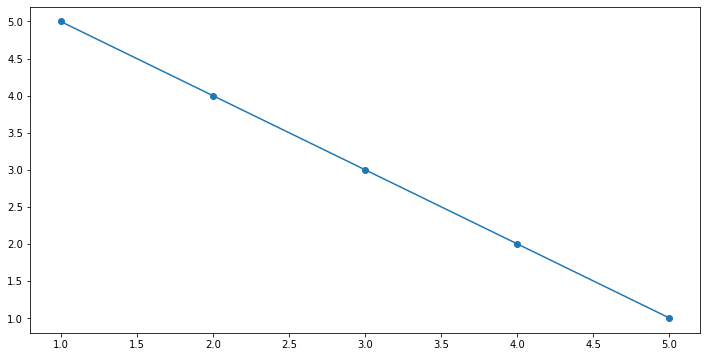

In [38]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [39]:
train_pca = pca.transform(train_set)

In [40]:
train_pca.shape

(200, 6)

In [41]:
test_pca = pca.transform(test_set)

In [42]:
Cluster_error = []

cluster_range = range( 1, 6 )

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 5, random_state=2)
  clusters.fit(pca_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": Cluster_error } )
clusters_df[0:6]

,num_clusters,cluster_errors
0,1,5.0
1,2,4.0
2,3,3.0
3,4,2.0
4,5,1.0
